# Lecture 8: Data Correlation and Categorical Variable Encoding

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Data Correlation
- Heatmap
- Dealing with categorical variables
- Label encoding
- One-hot encoding
- Categorical variable creation from the numeric variable

#### References:
[1] Seaborn heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
<br>[2] Correlation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
<br>[3] One-Hot Encoding vs. Label Encoding using Scikit-Learn: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
<br>[4] Label Encoding: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
<br>[5] One-hot encoding: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
<br>[6] https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [165]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

sns.set_context("talk")

#### Load data

In [166]:
df = pd.read_csv("bmw.csv")

display(df.head(10))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
5,5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0
6,5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0
7,2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5
8,4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0
9,5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0


In [167]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


#### Find correlations between the variables

**Assumptions:**

- Car price increases when engineSize increases
- Car price increases when mpg increases
- Car price decreases when the mileage increases
- When the engineSize increases, the mpg decreases
- Car price increases with the latest year cars

In [168]:
df_cor = df.corr()

display(df_cor)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.623756,-0.774382,0.025200,-0.071762,-0.026337
price,0.623756,1.000000,-0.605397,0.263484,-0.204882,0.460196
mileage,-0.774382,-0.605397,1.000000,-0.170747,0.118609,-0.002540
tax,0.025200,0.263484,-0.170747,1.000000,-0.351798,0.429616
mpg,-0.071762,-0.204882,0.118609,-0.351798,1.000000,-0.399844
engineSize,-0.026337,0.460196,-0.002540,0.429616,-0.399844,1.000000


#### Show a heatmap of the correlations

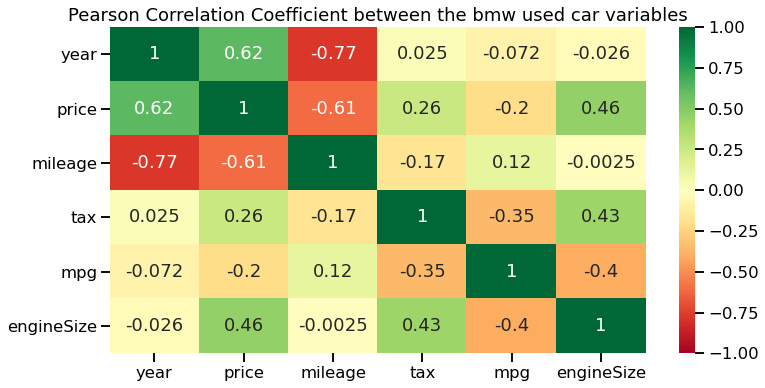

In [169]:
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient between the bmw used car variables")
plt.show()

**Observations:**

- Car price increases when engineSize increases: **True.** 
- Car price increases when mpg increases: **False.** 
- Car price decreases when the mileage increases: **True.** 
- When the engineSize increases, the mpg decreases: **True.** 
- Car price increases with the latest year cars: **True.** 
- Road tax increases when the engineSize increases. 

#### Dealing with categorical variables

In [170]:
print(df['transmission'].unique())
print(len(df['transmission'].unique()))
display(df['transmission'].value_counts())

['Automatic' 'Manual' 'Semi-Auto']
3


Semi-Auto    4666
Automatic    3588
Manual       2527
Name: transmission, dtype: int64

In [171]:
# LE.classes_

In [172]:
print(df['fuelType'].unique())
print(len(df['fuelType'].unique()))
display(df['fuelType'].value_counts())
# display(df['fuelType_'].value_counts())

['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']
5


Diesel      7027
Petrol      3417
Hybrid       298
Other         36
Electric       3
Name: fuelType, dtype: int64

In [173]:
print(df['model'].unique())
print(len(df['model'].unique()))
display(df['model'].value_counts())

[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
24


 3 Series    2443
 1 Series    1969
 2 Series    1229
 5 Series    1056
 4 Series     995
 X1           804
 X3           551
 X5           468
 X2           288
 X4           179
 M4           125
 6 Series     108
 Z4           108
 X6           106
 7 Series     106
 X7            55
 i3            43
 8 Series      39
 M5            29
 M3            27
 M2            21
 i8            17
 M6             8
 Z3             7
Name: model, dtype: int64

#### Label Encoding

In [174]:
LE = LabelEncoder()

df['transmission'] = LE.fit_transform(df['transmission'])
df['fuelType'] = LE.fit_transform(df['fuelType'])
df['model'] = LE.fit_transform(df['model'])

display(df.sample(10))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3063,1,2019,20450,2,3422,0,145,65.7,2.0
8144,4,2018,21940,0,53519,3,135,156.9,2.0
9533,4,2016,17499,0,30754,0,30,62.8,2.0
6361,2,2019,29530,2,2203,4,145,42.2,2.0
6097,2,2017,17182,1,34687,0,145,60.1,2.0
9414,4,2013,8999,0,178987,2,190,40.4,3.0
8888,0,2018,13425,1,22045,4,150,53.3,1.5
9192,15,2016,15795,0,73850,0,200,47.9,3.0
4718,17,2019,49950,2,7220,0,145,37.7,3.0
2035,2,2016,19367,0,25666,0,160,51.4,3.0


#### One-hot Encoding

In [175]:
df = pd.read_csv("bmw.csv")

df_transmission = pd.get_dummies(df[['transmission']])
# df_transmission = pd.get_dummies(df[['transmission']], drop_first=True)

display(df_transmission.sample(6))

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
9715,1,0,0
8158,0,1,0
6011,0,0,1
473,0,0,1
4023,1,0,0
3111,0,0,1


In [176]:
# df_transmission = pd.get_dummies(df[['transmission']])
df_transmission = pd.get_dummies(df[['transmission']], drop_first=True)

display(df_transmission.sample(6))

,transmission_Manual,transmission_Semi-Auto
7573,0,0
9518,0,0
7078,0,1
6449,0,1
2384,0,1
6384,0,1


In [177]:
print(df.shape)
df = pd.get_dummies(df, drop_first=True)

display(df.sample(6))
print(df.shape)

(10781, 9)


,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
5809,2019,55990,6007,145,33.6,3.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1503,2016,14998,78843,150,55.4,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8064,2017,12899,66243,145,68.9,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7165,2020,35875,2000,145,54.3,2.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4994,2019,25444,13033,145,42.2,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1976,2015,14160,41075,30,62.8,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


(10781, 35)


#### Categorical variable creation

In [178]:
df[['mileage']].describe()

,mileage
count,10781.000000
mean,25496.986550
std,25143.192559
min,1.000000
25%,5529.000000
50%,18347.000000
75%,38206.000000
max,214000.000000


In [179]:
df = pd.read_csv("bmw.csv")

df['mileage_range'] = pd.cut(df['mileage'], 
                             bins=[0, 50000, 100000, 150000, 214000], 
                             labels=["Excellent", "Good", "Medium", "Bad"])

display(df.sample(10))
display(df['mileage_range'].value_counts())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage_range
6822,3 Series,2015,15482,Semi-Auto,22288,Diesel,125,58.9,2.0,Excellent
3960,2 Series,2019,20980,Manual,1000,Petrol,145,52.3,1.5,Excellent
5786,1 Series,2014,10462,Manual,29260,Petrol,145,50.4,1.6,Excellent
2714,X5,2017,55990,Automatic,10,Diesel,145,47.1,3.0,Excellent
2812,1 Series,2019,18450,Semi-Auto,5882,Petrol,145,54.3,1.5,Excellent
1272,X3,2016,21991,Semi-Auto,30057,Diesel,145,54.3,2.0,Excellent
9169,3 Series,2015,11295,Automatic,94590,Diesel,30,62.8,2.0,Good
9956,4 Series,2016,13999,Manual,43000,Diesel,30,67.3,2.0,Excellent
6202,1 Series,2016,11990,Manual,33779,Diesel,20,68.9,2.0,Excellent
6232,2 Series,2019,21785,Automatic,10218,Hybrid,135,148.7,1.5,Excellent


Excellent    9083
Good         1575
Medium        115
Bad             8
Name: mileage_range, dtype: int64

# Summary of Data Analysis with Python
What you have learned from this module:

- Importing Data (csv, xlsx, txt etc.) with Pandas
- dealing with data importing errors such as UnicodeDecodeError
- creating a new DataFrame
- concatenation of two dataframes
- column splitting
- creating a new column in a dataframe
- replace/removing a value from a pandas column
- removing a column from the dataframe
- renaming column names
- extracting new information from a column
- creating a column based on a condition or function
- Removing a string from a column
- Checking the unique values for each column
- performing calculation in dataframe columns
- dataframe sorting
- dataframe slicing
- data cleaning
- data visualization of missing values
- string to datetime conversion
- removing missing values
- replacing missing values by: 1. mean, 2. median, 3. constant, 4. interpolation, 5. forward imputation, 6. backward imputation
- inner join, outer join, left join, right join
- Data filtering
- Data Aggregation/grouping 
- Pivot table
- Data Visualization: Barplot
- Data Correlation & Heatmap
- Dealing with categorical variables: 1. Label encoding, 2. One-hot encoding
- Categorical variable creation from the numeric variable